In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
import xgboost as xgb
from IPython.display import Image
import datetime
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
train_transaction_df1 = pd.read_csv(r'C:\Project\costello_ace_2017-2018.csv', low_memory=False)

In [2]:
train_transaction_df = pd.read_csv(r'C:\Users\rishk\Downloads\costello_ace_2015-2016.csv', low_memory=False)

In [4]:
train_transaction_df = train_transaction_df.dropna()

In [5]:
train_transaction_df1 = train_transaction_df1.dropna()

In [6]:
train = pd.concat([train_transaction_df1, train_transaction_df])

In [7]:
train_transaction_df = train

In [3]:
train_transaction_df.describe()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
count,15627499,15627494,15627449,15627494,15627494,15627494,15574121,15627494,15627494,15627494,...,15627494,10359912,9324585,10425583,15627494,15627494,15627494,15627494,15594548,543985
unique,732,60183,312945,1128021,30,30,133073,104688,103296,1594,...,9787,6729,10200,312595,962,5,371,5,15,11
top,11/25/2016,12:12:46,*5,5215,B,14252 ISLAND PARK,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1,...,0,11758,1013,1981485985,DAWN C,Sale,1,Sale,Retail,W
freq,60481,935,4569319,374,1913157,1913157,2620074,1022540,996474,10157546,...,10303546,763711,8203,42730,173599,14339178,6396603,14339178,10054711,385020


In [4]:
train_transaction_df1 = train_transaction_df.dropna()

In [8]:
train_transaction_df.shape

(55175, 39)

In [9]:
train_transaction_df

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
4858,4/1/2017,10:46:58,147128,F13409,8,11428 MASSAPEQUA PARK,70798086418,10909,SILICONE W&D CLEAR 9.8OZ,-1,...,3.49,11762,3545,1907613844,BRIANA LAURIA,Return,2,Return,Return Validation,W
5785,4/1/2017,11:01:56,339992,I54026,J,15238 SMITHTOWN,OTHER,7287154,FERTILIZR 4STEP PRGM 5M,-1,...,3,11787,2234,1929564530,BRIAN SCHMELING,Return,1,Return,Return Validation,W
6679,4/1/2017,11:19:44,11607,C38354,S,16147 CALDWELL,70183510900,7317464,WEED&GRASS KILLER 1.1GAL,-1,...,2,7006,4155,1903125237,MARGO TAYLOR,Defective,1,Defective,Promotion,D
6868,4/1/2017,11:22:33,*7350,B87854,R,16038 NORTH BELLMORE,OTHER,J2290974OF,NEWPORT S/4 DOF DRINKWARE,-1,...,3.99,11566,4209,1978247256,JOSEPH D'AZZO,Defective,1,Defective,Return Validation,D
7794,4/1/2017,11:38:10,141459,A34929,Q,15998 BALDWIN HARBOR,OTHER,7232325,CRABGRASS PRVNTR/FERT 5M,-1,...,5,11572,2610,1913917064,SARAH ALGOZA,Return,1,Return,Return Validation,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15623260,9/30/2016,16:36:30,373676,A58009,B,14252 ISLAND PARK,43168899512,3518099,LED GE CAM 40W EQ SFT WH,-1,...,3,29412,2941,1935600737,JASMINE MARTINEZ,Return,3,Return,Return Validation,W
15624525,9/30/2016,17:28:22,*37748,B25357,R,16038 NORTH BELLMORE,OTHER,3517752,LED GE CAC 40W EQ SFT WH,-1,...,3,11710,3010,1903296123,Sabrina Niedfeld,Return,1,Return,Return Validation,W
15625188,9/30/2016,18:01:11,134265,I38013,3,3164 NESCONSET,OTHER,AR69499,LOVESEAT GLIDER,-1,...,64.99,11779,3504,1912283913,THOMAS MINICOZZI,Return,2,Return,Return Validation,W
15625568,9/30/2016,18:18:55,182273,J79481,F,14822 NORTHPORT,OTHER,S9800,11A19/LED/2700K/120V/4PK,-1,...,8,11768,1300,1913854907,MICHAEL FIGOSKI,Return,1,Return,Return Validation,W


In [3]:
train_transaction_df['Pricing Source'].unique()

array(['Category Price Plan', 'Retail', 'Manual Override',
       'Return Validation', 'Promotion', 'Average Cost', 'No Charge',
       'Quantity Break', 'Loyalty', nan, '*', 'Multiple Selling Price',
       'Promo Key', 'Open Quote', 'Replacement Cost', 'Pricing Source'],
      dtype=object)

C:\Users\rishk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


Text(0.5, 0, 'Pricing Source')

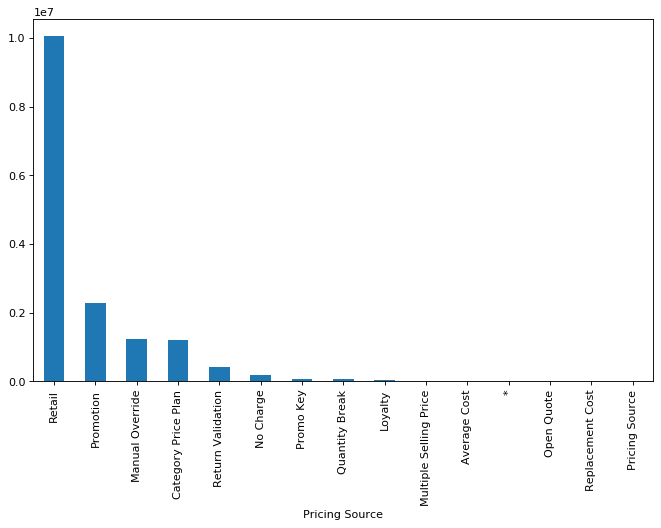

In [4]:
plt.figure(figsize=(10,6), dpi= 80)
pd.Series(train_transaction_df['Pricing Source']).value_counts().plot('bar')
plt.xlabel('Pricing Source')

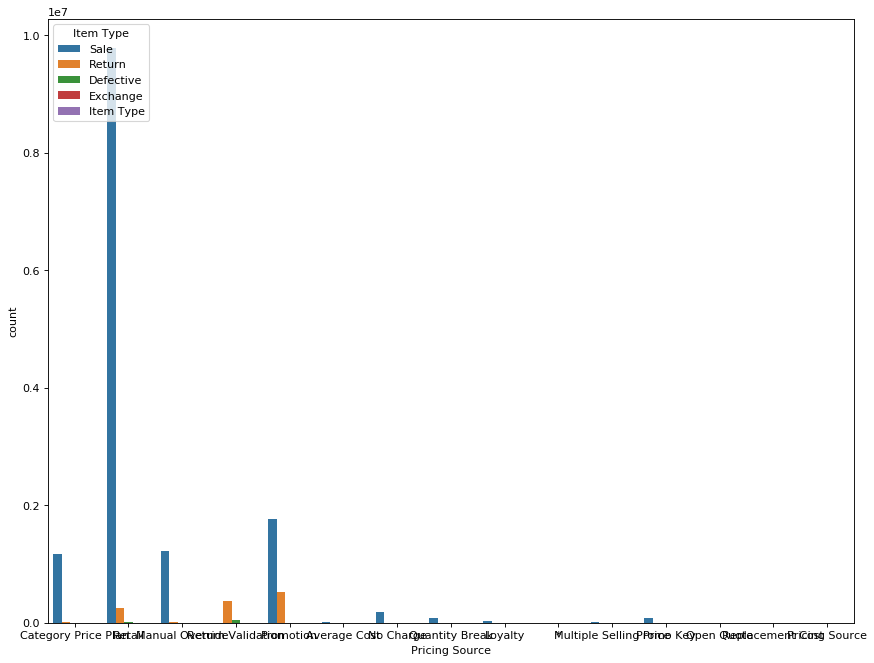

In [5]:
plt.figure(figsize=(13,10), dpi= 80)
sns.countplot(x='Pricing Source',hue='Item Type',data=train_transaction_df)

In [ ]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(train_transaction_df1['Pricing Source'],train_transaction_df1['Return Code'], c='coral')
plt.title('Density Plot of  Pricing Source  in training data')
plt.xlabel(' Pricing Source')
plt.ylabel('Counts')

In [ ]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(train_transaction_df1['Pricing Source'],train_transaction_df1['Item Type'], c='coral')
plt.title('Density Plot of  Pricing Source  in training data')
plt.xlabel(' Pricing Source')
plt.ylabel('Counts')

In [ ]:
# most correlated features
train_transaction_df1.corr()

In [ ]:
train_transaction_df = train_transaction_df[pd.notnull(train_transaction_df['Date'])]

In [ ]:
train_transaction_df[train_transaction_df["Date"] != "Date"]

In [4]:
train_transaction_df["Date"] =  pd.to_datetime(train_transaction_df['Date'], errors='coerce')

In [5]:
train_transaction_df.dtypes

Date                          datetime64[ns]
Transaction Time                      object
Customer Number                       object
Receipt Number                        object
Store #                               object
Store Name                            object
Scanned UPC                           object
Item Number                           object
Item Description                      object
Net Sales Units                       object
Net Sales                             object
Cost                                  object
Gross Margin                          object
Gross Margin %                        object
Department Code                       object
Department Name                       object
Class Code                            object
Class Name                            object
Fineline Code                         object
Fineline Name                         object
Item was Scanned                      object
MIP Promo ID                          object
Promo/Disc

In [11]:
train_transaction_df["Clerk"].unique()

array(['MELISSA MOORMAN', 'CHARLES GRAHAM', 'GABRIELA PARATORE',
       'MICHAEL BENTIVEGNA', 'MICHAEL NOONAN', 'DAWN C', 'TAMMY LEONARD',
       'JOSEPH COTTONE', 'GERRY T', 'ANNFORTUNATO',
       'HENRY "HANK" SCHURMAN', 'JOHN GAFFNEY', 'JAMES RUCKER',
       'KRISTINA HUSSEY', 'TIMOTHY CONDRA', 'UNKNOWN CLERK KABPOS',
       'LISA JUDGE', 'NANCY WENDLER', 'BREANA HUME', 'DOROTHY MARANO',
       'UNKNOWN CLERK MGBPOS', 'DIANE QUINN', 'KIA LANE', 'HAROLD BOND',
       'LIKENIS LIZARDO', 'MARY MISKOVSKY', 'MARK SMILOWITZ',
       'AUSTIN ROLEN', 'VINCENT GOULSTON', 'ERIC WEISS', 'JESS PENAFIEL',
       'GINA PLATANIA', 'CHRISTOPHER LANE', 'PHILLIP NUNEZ', 'JOHN HIGH',
       'KRISTY BUCYNSKI', 'SAMANTHA A KENNEDY', 'NICHOLAS DUBOWSKI',
       'KATHRYN GIANNELLI', 'ERIC RERECICH', 'KARIN NORRIS',
       'JUAN TORRES', 'ANTHONY KATERIDGE', 'UNKNOWN CLERK KMCPOS',
       'ALBERT LITTMANN', 'NICHOLAS MAIO', 'RORY FANNON', 'SALVATORE R',
       'LESLIE STEINGOLD', 'MICHELLE LYNAM STRIBULA',

In [28]:
groupby_df = (train_transaction_df.groupby(['Store #','Item Description'])['Item Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('Store #', keep='first'))

In [29]:
groupby_df

,Store #,Item Description,count
0,B,FASTENERS/SCREWS/NAILS/BOLTS ETC,88862
1,6,FASTENERS/SCREWS/NAILS/BOLTS ETC,71182
2,X,FASTENERS/SCREWS/NAILS/BOLTS ETC,67387
3,9,FASTENERS/SCREWS/NAILS/BOLTS ETC,50039
4,T,FASTENERS/SCREWS/NAILS/BOLTS ETC,49589
5,E,FASTENERS/SCREWS/NAILS/BOLTS ETC,48055
6,I,FASTENERS/SCREWS/NAILS/BOLTS ETC,47335
7,8,FASTENERS/SCREWS/NAILS/BOLTS ETC,46554
8,4,FASTENERS/SCREWS/NAILS/BOLTS ETC,46457
9,3,FASTENERS/SCREWS/NAILS/BOLTS ETC,44410


In [9]:
zip = pd.Series(train_transaction_df["Zip Code"].dropna().unique())

In [30]:
store = train_transaction_df[train_transaction_df['Store #'] =='P']

In [31]:
store

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,3,...,10,11703,NaN,1982029025,MELISSA MOORMAN,Sale,1,Sale,Category Price Plan,NaN
1,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05482X,REG SEL INT MATTE BS2 GL,2,...,10,11703,NaN,1982029025,MELISSA MOORMAN,Sale,3,Sale,Category Price Plan,NaN
7,4/1/2015,7:33:16,659780,A35827,P,15784 EI PAINT,OTHER,BN53601F,ULTRA SPEC 500 FLAT-WHITE -- 5 G,1,...,22,11751,NaN,1982089593,MELISSA MOORMAN,Sale,1,Sale,Category Price Plan,NaN
8,4/1/2015,7:33:16,659780,A35827,P,15784 EI PAINT,OTHER,B055104,REGAL SELECT SEMI-GL DECO WH,1,...,10,11751,NaN,1982089593,MELISSA MOORMAN,Sale,3,Sale,Category Price Plan,NaN
9,4/1/2015,7:33:16,659780,A35827,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,1,...,10,11751,NaN,1982089593,MELISSA MOORMAN,Sale,4,Sale,Category Price Plan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15623971,9/30/2016,17:07:40,119708,A76012,P,15784 EI PAINT,98262000753,32200075,PLASTIC DEEP WELL TRAY,2,...,0.2,11730,NaN,1981800829,DENNIS BOCHICCHIO,Sale,1,Sale,Category Price Plan,NaN
15623972,9/30/2016,17:07:40,119708,A76012,P,15784 EI PAINT,77089173123,1467810,"MICROFIBER COVER 9"" 3/8""",2,...,0.7,11730,NaN,1981800829,DENNIS BOCHICCHIO,Sale,2,Sale,Category Price Plan,NaN
15623973,9/30/2016,17:07:40,119708,A76012,P,15784 EI PAINT,OTHER,B05491X,REG SEL INT EGGSHL B1 GL,1,...,10,11730,NaN,1981800829,DENNIS BOCHICCHIO,Sale,3,Sale,Category Price Plan,NaN
15623974,9/30/2016,17:07:40,119708,A76012,P,15784 EI PAINT,90548212911,BXA0101,PRIMER AQUA LOCK PLUS WHITE,1,...,5,11730,NaN,1981800829,DENNIS BOCHICCHIO,Sale,4,Sale,Category Price Plan,NaN


In [10]:
zip.to_csv(r'C:\Project\ZipData.csv', index=False)

C:\Users\rishk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


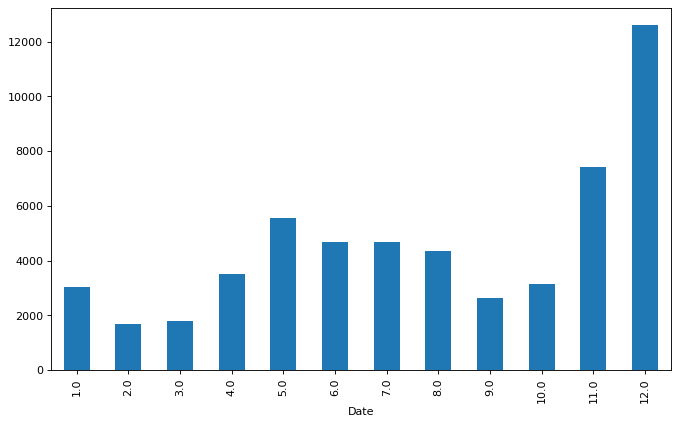

In [12]:
plt.figure(figsize=(10,6), dpi= 80)
train_transaction_df["Pricing Source"].groupby(train_transaction_df["Date"].dt.month).count().plot(kind="bar")

In [7]:
train_transaction_df["Pricing Source"].unique()

array(['Category Price Plan', 'Retail', 'Manual Override',
       'Return Validation', 'Promotion', 'Average Cost', 'No Charge',
       'Quantity Break', 'Loyalty', nan, '*', 'Multiple Selling Price',
       'Promo Key', 'Open Quote', 'Replacement Cost', 'Pricing Source'],
      dtype=object)

In [8]:
train_transaction_df["Pricing Source"].value_counts()

Retail                    10054711
Promotion                  2298410
Manual Override            1228142
Category Price Plan        1200376
Return Validation           420114
No Charge                   181857
Promo Key                    76933
Quantity Break               76067
Loyalty                      29879
Multiple Selling Price       14158
Average Cost                  9064
*                             3971
Open Quote                     812
Replacement Cost                31
Pricing Source                  23
Name: Pricing Source, dtype: int64

In [10]:
train_transaction_df['Zip Code'].unique()

array(['11703', nan, '11751', ..., '80443', '37186', '81212'],
      dtype=object)

In [11]:
train_transaction_df['Actual Price']

0           39.99
1           39.99
2            2.99
3            2.99
4           14.99
            ...  
15627494      2.1
15627495     3.06
15627496        2
15627497     1.19
15627498      NaN
Name: Actual Price, Length: 15627499, dtype: object

In [12]:
train_transaction_df.columns.values

array(['Date', 'Transaction Time', 'Customer Number', 'Receipt Number',
       'Store #', 'Store Name', 'Scanned UPC', 'Item Number',
       'Item Description', 'Net Sales Units', 'Net Sales', 'Cost',
       'Gross Margin', 'Gross Margin %', 'Department Code',
       'Department Name', 'Class Code', 'Class Name', 'Fineline Code',
       'Fineline Name', 'Item was Scanned', 'MIP Promo ID',
       'Promo/Discount', 'Dynamic Promo ID', 'Actual Price',
       'Retail Price', 'Actual-Retail', 'Taxable', 'Tender Type',
       '$ Off Retail', 'Zip Code', 'Zip Plus-4', 'Loyalty ID', 'Clerk',
       'Item Type', 'Line #', 'Line Item Transaction Type',
       'Pricing Source', 'Return Code'], dtype=object)

In [13]:
train_transaction_df[['Item Description','Gross Margin %']]

,Item Description,Gross Margin %
0,REG SEL INT MATTE BS1 GL,31.41%
1,REG SEL INT MATTE BS2 GL,35.58%
2,BLADE CUTOFF 4.5X1/16MTL,70.90%
3,CUT WHL4-1/2X.045 MTL,73.41%
4,GLOVE LTHR PALM WRK 3PK,63.58%
...,...,...
15627494,"CORD STRETCH 48"" HVY DTY",20.00%
15627495,TARP POLY BLUE/BRN 6X8,19.93%
15627496,SPRAYER ORBITAL 24 OZ,20.00%
15627497,SPRITE 20OZ,20.17%


In [ ]:
train_transactiondf2 = train_transaction_df


In [24]:
train_promo = train_transaction_df[train_transaction_df['Clerk'] =='MELISSA MOORMAN']

In [26]:
train_promo["Zip Code"]

0           11703
1           11703
7           11751
8           11751
9           11751
            ...  
15011152    11570
15011173    11570
15011689      NaN
15014363      NaN
15014364      NaN
Name: Zip Code, Length: 20690, dtype: object

Text(0, 0.5, 'Item')

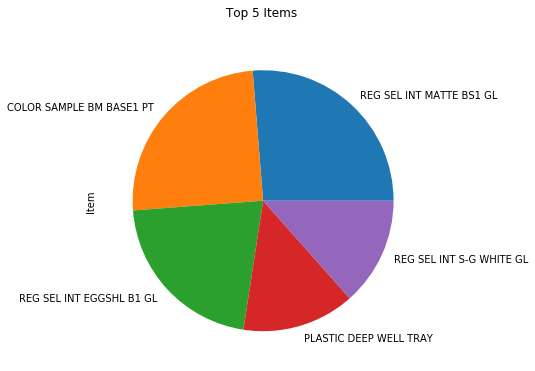

In [25]:
plt.figure(figsize=(10,6))
train_promo['Item Description'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Top 5 Items \n')
plt.ylabel('Item')

In [16]:
train_promo = train_transaction_df[train_transaction_df['Pricing Source'] =='Promotion']

In [17]:
train_transaction_df.count()

Date                          15627499
Transaction Time              15627494
Customer Number               15627449
Receipt Number                15627494
Store #                       15627494
Store Name                    15627494
Scanned UPC                   15574121
Item Number                   15627494
Item Description              15627494
Net Sales Units               15627494
Net Sales                     15627494
Cost                          15627494
Gross Margin                  15627494
Gross Margin %                15412757
Department Code               15627466
Department Name               15627494
Class Code                    15342698
Class Name                    15627494
Fineline Code                 13740083
Fineline Name                 15627494
Item was Scanned              15620003
MIP Promo ID                   2389065
Promo/Discount                 3208497
Dynamic Promo ID              15627494
Actual Price                  15627494
Retail Price             

In [18]:
train_promo

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
37,4/1/2015,7:46:35,*5,E89658,B,14252 ISLAND PARK,71798108681,1010842,"STIFF POLY PUSHBROOM 24""",1,...,7.02,NaN,NaN,NaN,GABRIELA PARATORE,Sale,4,Sale,Promotion,NaN
73,4/1/2015,7:59:31,111195,A12704,6,11116 BELLMORE,82901728771,72877,"POLY LEAF RAKE 24"" ACE",1,...,4,11710,2449,1922979213,GERRY T,Sale,1,Sale,Promotion,NaN
80,4/1/2015,8:00:19,*A47WT,F68270,X,16661 PASADENA,82901057314,1965425,RYL SG INT UWB 1GAL,1,...,10,21122,4712,1975460318,UNKNOWN CLERK KABPOS,Sale,1,Sale,Promotion,NaN
81,4/1/2015,8:00:19,*A47WT,F68270,X,16661 PASADENA,71497167583,1371541,"PRO 9"" ROLLER WOVEN 3/8""",1,...,1.5,21122,4712,1975460318,UNKNOWN CLERK KABPOS,Sale,2,Sale,Promotion,NaN
267,4/1/2015,8:21:21,11332,109345,4,6910 FARMINGDALE,OTHER,7104052,MG POTTING MIX SOIL 2CF,1,...,5,11762,NaN,1981736060,KIA LANE,Sale,1,Sale,Promotion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15627398,9/30/2016,20:52:20,*5,F30938,9,11730 BETHPAGE,8.56682E+11,DBAGS55,DRUM BAGS 55GAL 2MIL. 20CNT,1,...,1,NaN,NaN,NaN,NICHOLAS BUSCEMI,Sale,2,Sale,Promotion,NaN
15627402,9/30/2016,20:52:39,*37016,B25402,R,16038 NORTH BELLMORE,79545401030,JG40103,COSTELLO'S CONTRACTOR MIX 3LB,1,...,2,11710,1910,1900840578,Sabrina Niedfeld,Sale,1,Sale,Promotion,NaN
15627423,9/30/2016,20:57:01,*5,A86872,U,16354 LINCOLN PARK,86876014679,70206,TRASH CAN32GAL BRUTE GRA,1,...,5,NaN,NaN,NaN,AZIKULE WALKER,Sale,1,Sale,Promotion,NaN
15627424,9/30/2016,20:57:01,*5,A86872,U,16354 LINCOLN PARK,OTHER,IS110539,70206 $5 INST SAVINGS,-1,...,0,NaN,NaN,NaN,AZIKULE WALKER,Return,2,Return,Promotion,NaN


In [19]:
train_transaction_df["Promo/Discount"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
15627494    NaN
15627495    NaN
15627496    NaN
15627497    NaN
15627498    NaN
Name: Promo/Discount, Length: 15627499, dtype: object

In [20]:
train_transaction_df["Pricing Source"].isnull().sum()/len(train_transaction_df["Pricing Source"])

0.0021085267706624075

In [21]:
train_transaction_df["Pricing Source"].count()

15594548

In [22]:
train_transaction_df["Promo/Discount"].unique()

array([nan, 'S', '*', 'Q', 'D', 'P', 'Promo/Discount'], dtype=object)

In [23]:
train_transaction_df["Promo/Discount"].isnull().sum()

12419002

In [24]:
len(train_transaction_df["Promo/Discount"])

15627499

In [25]:
train_transaction_df["Promo/Discount"].isnull().sum()/len(train_transaction_df["Promo/Discount"])

0.7946890286155194

In [26]:
train_transaction_df["Pricing Source"].unique()

array(['Category Price Plan', 'Retail', 'Manual Override',
       'Return Validation', 'Promotion', 'Average Cost', 'No Charge',
       'Quantity Break', 'Loyalty', nan, '*', 'Multiple Selling Price',
       'Promo Key', 'Open Quote', 'Replacement Cost', 'Pricing Source'],
      dtype=object)

In [27]:
train_transaction_df["Promo/Discount"].unique()

array([nan, 'S', '*', 'Q', 'D', 'P', 'Promo/Discount'], dtype=object)

In [28]:
train_transaction_df["Promo/Discount"].isnull().sum()/len(train_transaction_df["Promo/Discount"])

0.7946890286155194

In [29]:
train_transaction_df["Zip Code"].unique()

array(['11703', nan, '11751', ..., '80443', '37186', '81212'],
      dtype=object)

In [30]:
train_transaction_df["Store #"].isnull().sum()/len(train_transaction_df["Store #"])

3.199488286641388e-07

In [31]:
train_transaction_df["Scanned UPC"].isnull().sum()/len(train_transaction_df["Scanned UPC"])

0.0034156457152868798

In [32]:
train_transaction_df["Class Code"].isnull().sum()/len(train_transaction_df["Class Code"])

0.018224349270475077

In [33]:
train_transaction_df["Fineline Code"].isnull().sum()/len(train_transaction_df["Fineline Code"])

0.12077530768039083

In [34]:
train_transaction_df["Fineline Name"].isnull().sum()/len(train_transaction_df["Fineline Name"])

3.199488286641388e-07

In [35]:
train_transaction_df["Clerk"].isnull().sum()/len(train_transaction_df["Clerk"])

3.199488286641388e-07

In [36]:
train_transaction_df["Taxable"].isnull().sum()/len(train_transaction_df["Taxable"])

3.199488286641388e-07

In [37]:
train_transaction_df["Line Item Transaction Type"].isnull().sum()/len(train_transaction_df["Line Item Transaction Type"])

3.199488286641388e-07

In [38]:
train_transaction_df["Item was Scanned"].isnull().sum()/len(train_transaction_df["Item was Scanned"])

0.0004796672839332769

In [39]:
train_transaction_df["$ Off Retail"].isnull().sum()/len(train_transaction_df["$ Off Retail"])

3.199488286641388e-07

In [40]:
train_transaction_df["Line #"].isnull().sum()/len(train_transaction_df["Line #"])

3.199488286641388e-07

In [41]:
train_transaction_df["Loyalty ID"].isnull().sum()/len(train_transaction_df["Loyalty ID"])

0.3328693862018484

In [42]:
train_transaction_df["Return Code"].isnull().sum()/len(train_transaction_df["Return Code"])

0.9651905272878277

In [43]:
train_transaction_df["Department Code"].isnull().sum()/len(train_transaction_df["Department Code"])

2.111662269183316e-06

In [44]:
train_transaction_df["Gross Margin"].isnull().sum()/len(train_transaction_df["Gross Margin"])

3.199488286641388e-07

In [45]:
train_transaction_df["Net Sales"].isnull().sum()/len(train_transaction_df["Net Sales"])

3.199488286641388e-07

In [46]:
per = train_transaction_df.Date.dt.to_period("M")

AttributeError: Can only use .dt accessor with datetimelike values

In [26]:
t1 = train_transaction_df.sample(n = 1000000)
t2 = train_transaction_df1.sample(n = 1000000)
train = pd.concat([t1, t2])

In [27]:
train["Net Sales"] = train["Net Sales"].str.replace(',', '')
train["Actual Price"] = train["Actual Price"].str.replace(',', '')
train["Retail Price"] = train["Retail Price"].str.replace(',', '')
train["Net Sales Units"] = train["Net Sales Units"].str.replace(',', '')

In [28]:
train = train.dropna(subset=["Net Sales"])


In [29]:
train = train.dropna(subset=["Actual Price"])
train["Actual Price"].unique()

array(['5.99', '12.99', '17.99', ..., '32.01', '181.73', '40.91'],
      dtype=object)

In [30]:
train = train[train["Actual Price"] != 'Actual Price']

In [31]:
train["Actual Price"] = train["Actual Price"].astype(float) 

In [32]:
train = train[train["Retail Price"] != 'Retail Price']

train = train.dropna(subset=["Retail Price"])

train["Retail Price"] = train["Retail Price"].astype(float) 

In [33]:
train = train[train["Net Sales"] != 'Net Sales']

In [59]:
train["Date"] =  pd.to_datetime(train['Date'])

In [60]:
train["Date"].dtypes

dtype('<M8[ns]')

In [ ]:
df1 = train_transaction_df.groupby(['Zip Code',per])['Net Sales'].sum()

In [13]:
train_transaction_df["Net Sales"] = train_transaction_df["Net Sales"].str.replace(',', '')

In [14]:
train_transaction_df["Actual Price"] = train_transaction_df["Actual Price"].str.replace(',', '')

In [15]:
train_transaction_df["Retail Price"] = train_transaction_df["Retail Price"].str.replace(',', '')

In [16]:
train_transaction_df["Net Sales Units"] = train_transaction_df["Net Sales Units"].str.replace(',', '')

In [17]:
train_transaction_df["Net Sales"]

4858          -3.5
5785        -79.99
6679        -18.99
6868            -4
7794        -24.99
             ...  
15623260     -8.99
15624525     -8.99
15625188       -65
15625568    -14.99
15625813      -8.5
Name: Net Sales, Length: 55175, dtype: object

In [18]:
train_transaction_df = train_transaction_df.dropna(subset=["Net Sales"])

In [19]:
train_transaction_df = train_transaction_df[train_transaction_df["Actual Price"] != 'Actual Price']

In [20]:
train_transaction_df = train_transaction_df.dropna(subset=["Actual Price"])

train_transaction_df["Actual Price"] = train_transaction_df["Actual Price"].astype(float) 

In [21]:
train_transaction_df = train_transaction_df[train_transaction_df["Retail Price"] != 'Retail Price']

train_transaction_df = train_transaction_df.dropna(subset=["Retail Price"])

train_transaction_df["Retail Price"] = train_transaction_df["Retail Price"].astype(float) 

In [22]:
train_transaction_df = train_transaction_df[train_transaction_df["Net Sales"] != 'Net Sales']

In [7]:
train = train_transaction_df

In [8]:
train = train.dropna(subset=["Pricing Source"])

C:\Users\rishk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


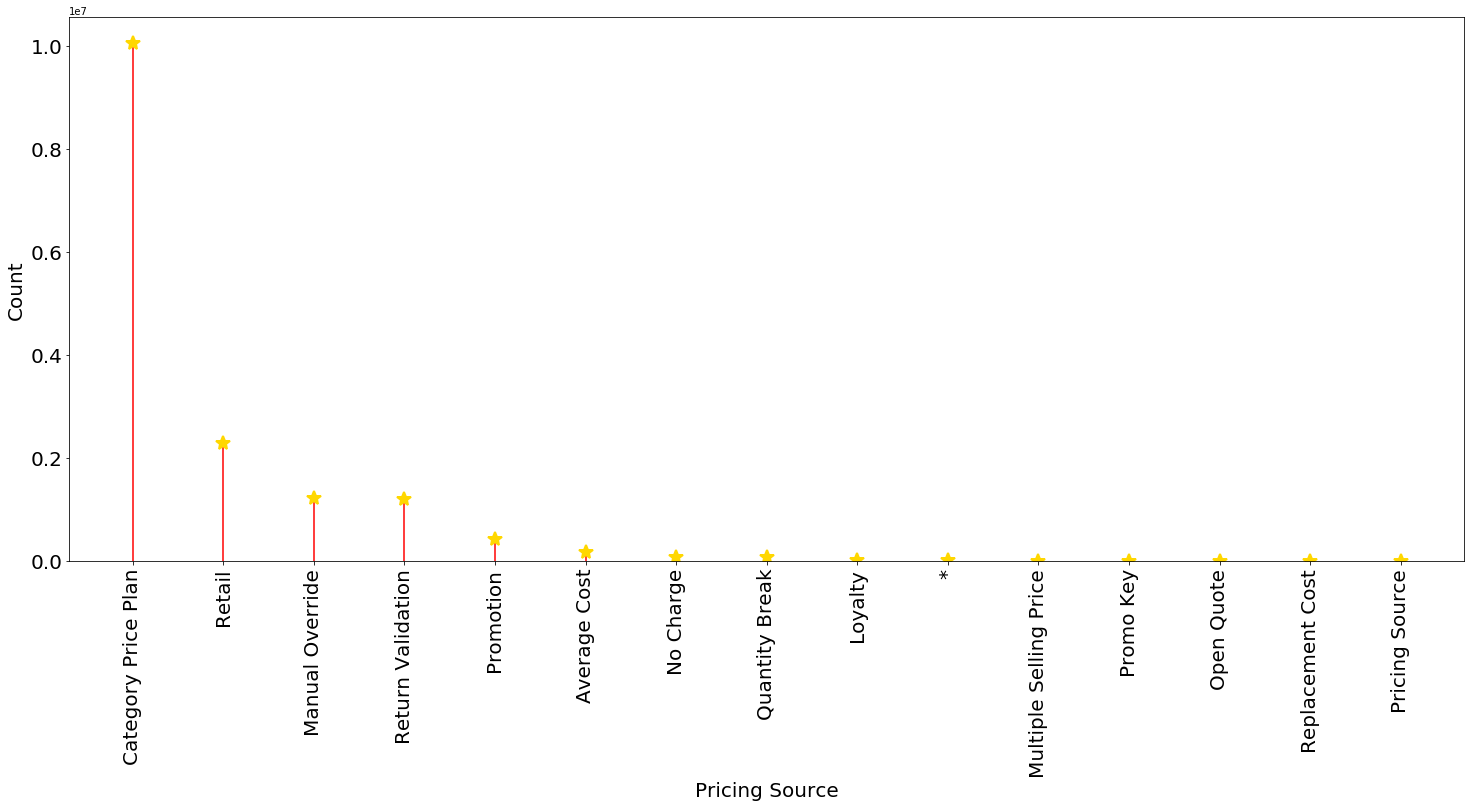

In [9]:
plt.figure(figsize=(25, 10))
(markerline, stemlines, baseline) = plt.stem(train['Pricing Source'].unique(),
                                             train['Pricing Source'].value_counts())
plt.setp(markerline, marker='*', markersize=15,
         markeredgewidth=2, color='gold')
plt.setp(stemlines, color='red')
plt.setp(baseline, visible=False)

plt.tick_params(labelsize=20)
plt.xticks(rotation=90)
plt.xlabel('Pricing Source', size=20)
plt.ylabel('Count', size=20)
plt.ylim(bottom=0)

plt.show()

In [14]:
train_transaction_df7 = train_transaction_df

In [ ]:
train_transaction_df7['Date'] = pd.to_datetime(train_transaction_df7['Date']) - pd.to_timedelta(7, unit='d')

In [ ]:
train_transaction_df7

In [ ]:
import scipy.stats as st

In [ ]:
price = train_transaction_df["Net Sales"]
plt.figure(figsize=(10,6), dpi= 80)
#fig, axs = plt.subplots(nrows=2)

sns.boxplot(price)
#sns.distplot(price, fit=st.norm, ax=axs[1])

plt.title("Distribution of price")
plt.show()

In [ ]:
price = train_transaction_df["Net Sales"]
plt.figure(figsize=(10,6), dpi= 80)
#fig, axs = plt.subplots(nrows=2)

#sns.boxplot(price)
sns.distplot(price, fit=st.norm)

plt.title("Distribution of price")
plt.show()

In [ ]:
train_transaction_df["Zip Code"].unique()

There are 1047 unique regions where the retail price is maximum:
Zip Code
11758    119
11710    114
11793    108
11572    106
11561    106
11566    103
11783    100
11787     99
11795     99
11757     98
Name: Retail Price, dtype: int64

TOP 10 cities covers 1.9 percent of all the orders.


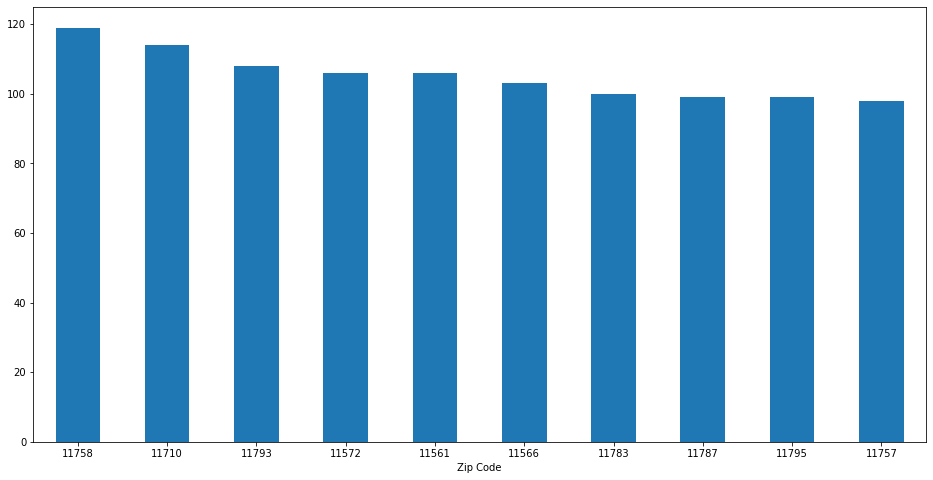

In [26]:
cities = train_transaction_df["Zip Code"].nunique()
c1 = train_transaction_df.groupby('Zip Code')['Retail Price'].nunique().sort_values(ascending=False)
print("There are",cities,"unique regions where the retail price is maximum:")
c2 = c1.head(10)
print(c2)
print("\nTOP 10 cities covers", round(c2.sum()/train_transaction_df.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

There are 5156 unique regions where the retail price is maximum in both the dataset:
Zip Code
21122    308
11758    304
21037    296
11710    291
11735    287
11793    285
11572    278
11701    275
11561    271
11787    262
Name: Retail Price, dtype: int64

TOP 10 cities covers 0.1 percent of all the orders.


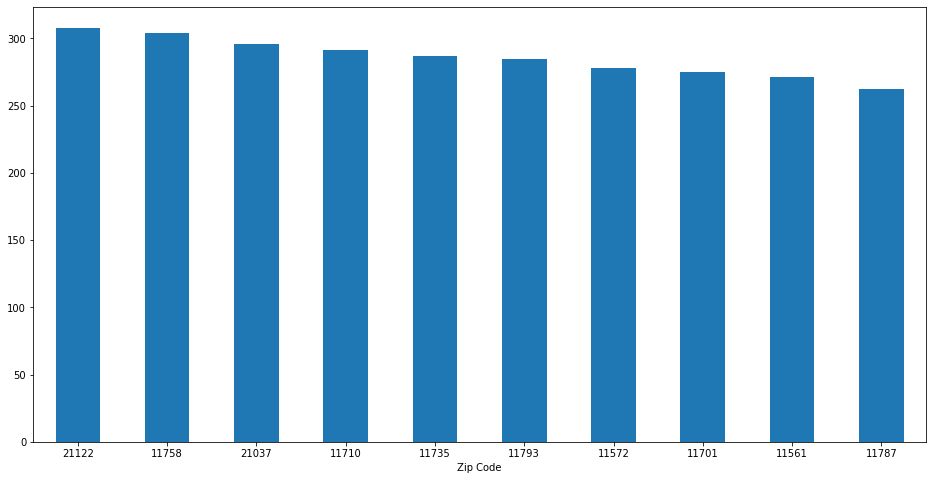

In [35]:
cities = train["Zip Code"].nunique()
c1 = train.groupby('Zip Code')['Retail Price'].nunique().sort_values(ascending=False)
print("There are",cities,"unique regions where the retail price is maximum in both the dataset:")
c2 = c1.head(10)
print(c2)
print("\nTOP 10 cities covers", round(c2.sum()/train.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

There are 1047 unique cities in the database. The TOP 10 cities are:
Zip Code
11758    461
11710    411
11793    370
11561    368
11572    346
11783    343
11566    295
11787    287
11762    282
11768    259
Name: Net Sales, dtype: int64

TOP 10 cities covers 6.2 percent of all the orders.


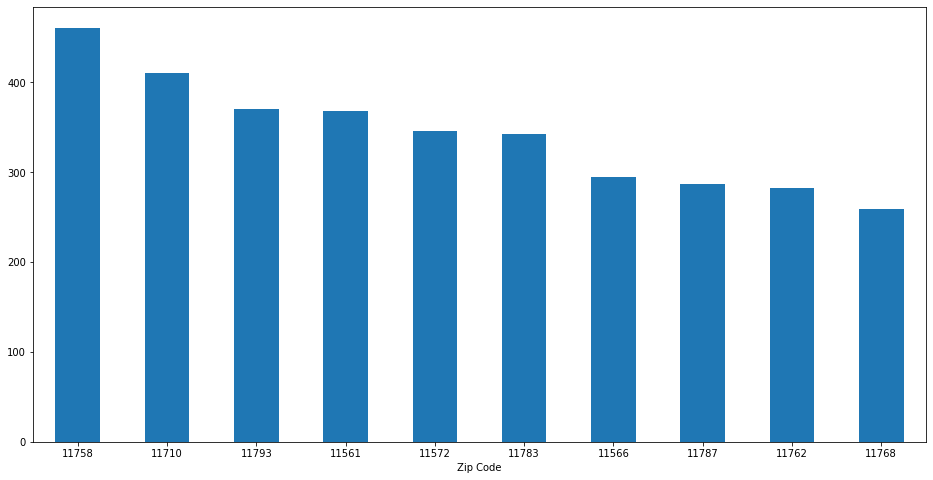

In [27]:
cities = train_transaction_df["Zip Code"].nunique()
c1 = train_transaction_df.groupby('Zip Code')['Net Sales'].nunique().sort_values(ascending=False)
print("There are",cities,"unique cities in the database. The TOP 10 cities are:")
c2 = c1.head(10)
print(c2)
print("\nTOP 10 cities covers", round(c2.sum()/train_transaction_df.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

In [12]:
train_zipcode = train_transaction_df[train_transaction_df["Zip Code"] == '11758']

In [13]:
train_zipcode.shape

(763711, 39)

In [14]:
train_transaction_df7["Date"] = train_transaction_df7["Date"].dt.year

NameError: name 'train_transaction_df7' is not defined

In [ ]:
trend_year=pd.DataFrame(train_transaction_df7.groupby('Date')['Net Sales'].sum().sort_values(ascending=False)).reset_index()
ax=sns.barplot(x='Date',y='Net Sales',data=train_transaction_df7,palette=sns.set_palette(palette='viridis_r'))
#ax.ticklabel_format()
ax.set_xlabel('Year')
ax.set_ylabel('Total Transaction Value')
ax.set_title('Transaction Value by Year')

In [15]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x=train_transaction_df['Pricing Source'],y=train_transaction_df['Net Sales'],palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Boxplot for different payment type")
ax.set_xlabel("Transaction type")
ax.set_ylabel("Transaction Value")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 720x576 with 0 Axes>

Text(0, 0.5, 'Item')

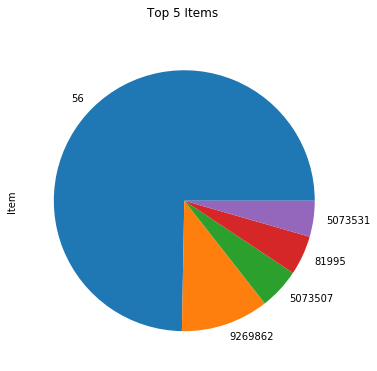

In [10]:
plt.figure(figsize=(10,6))
train_transaction_df['Item Number'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Top 5 Items \n')
plt.ylabel('Item')

Text(0, 0.5, 'Item')

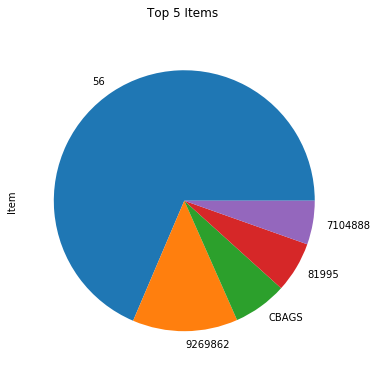

In [16]:
plt.figure(figsize=(10,6))
train_zipcode['Item Number'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Top 5 Items \n')
plt.ylabel('Item')

Text(0, 0.5, 'Item')

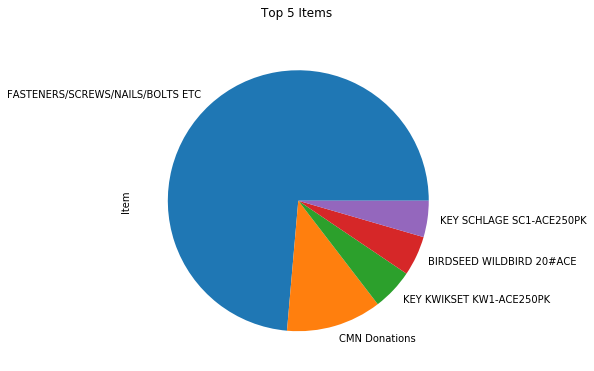

In [17]:
plt.figure(figsize=(10,6))
train_transaction_df['Item Description'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Top 5 Items \n')
plt.ylabel('Item')

Text(0, 0.5, 'Item')

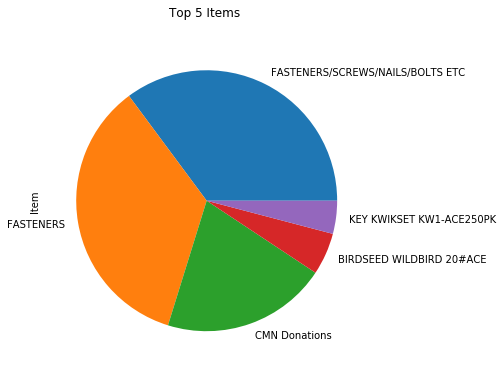

In [36]:
plt.figure(figsize=(10,6))
train['Item Description'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Top 5 Items \n')
plt.ylabel('Item')

Text(0, 0.5, 'Item')

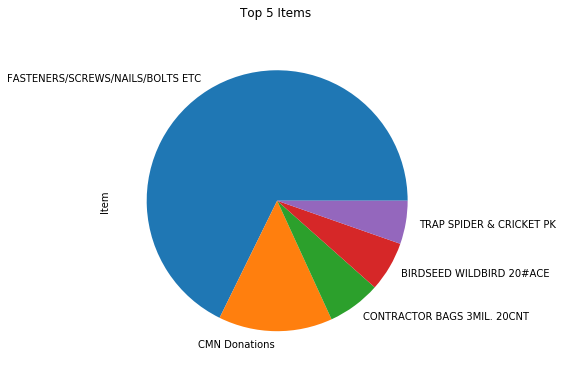

In [18]:
plt.figure(figsize=(10,6))
train_zipcode['Item Description'].value_counts().nlargest(5).plot(kind='pie')
plt.title('Top 5 Items \n')
plt.ylabel('Item')

In [19]:
a = train_zipcode[train_zipcode["Item Description"] == "FASTENERS/SCREWS/NAILS/BOLTS ETC"]
a

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
317,2015-04-01,8:26:59,215325,F19972,E,14664 NORTH MASSAPEQUA,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,2,...,-0.43,11758,4526,1916754894,JESS PENAFIEL,Sale,1,Sale,Manual Override,NaN
379,2015-04-01,8:32:16,194451,F19973,E,14664 NORTH MASSAPEQUA,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,2,...,-0.37,11758,4211,1913916535,JESS PENAFIEL,Sale,4,Sale,Manual Override,NaN
703,2015-04-01,9:00:09,*67622,F19978,E,14664 NORTH MASSAPEQUA,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,3,...,-0.15,11758,1243,1907419541,JESS PENAFIEL,Sale,1,Sale,Manual Override,NaN
1153,2015-04-01,9:35:57,186747,F19992,E,14664 NORTH MASSAPEQUA,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,4,...,-0.55,11758,1228,1913916167,JESS PENAFIEL,Sale,1,Sale,Manual Override,NaN
1496,2015-04-01,9:57:14,*27016,F20004,E,14664 NORTH MASSAPEQUA,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,3,...,-0.11,11758,4922,1978247071,JESS PENAFIEL,Sale,1,Sale,Manual Override,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15623490,2016-09-30,16:46:19,*3884,I33658,E,14664 NORTH MASSAPEQUA,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,-1,...,-0.35,11758,3938,1978440081,ELIZABETH NICHOLES,Return,3,Return,NaN,W
15623491,2016-09-30,16:46:19,*3884,I33658,E,14664 NORTH MASSAPEQUA,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,-1,...,-0.53,11758,3938,1978440081,ELIZABETH NICHOLES,Return,5,Return,NaN,W
15623982,2016-09-30,17:07:44,*65084,I33672,E,14664 NORTH MASSAPEQUA,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,3,...,-0.15,11758,3132,1907280040,ELIZABETH NICHOLES,Sale,1,Sale,Manual Override,NaN
15625714,2016-09-30,18:27:56,203657,E30848,4,6910 FARMINGDALE,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,4,...,-0.79,11758,7730,1914006419,DANA HARTMANN,Sale,1,Sale,Manual Override,NaN


In [48]:
import seaborn as sns
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange, HoverTool
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm import tqdm
from IPython.display import display
from random import randint

unit_df = train.groupby("Date").sum().reset_index()

source = ColumnDataSource(unit_df)
hover = HoverTool(
    tooltips=[
        ("Date", "@Date"),
        ("Retail Price", "@RetailSales{0.00 a}"),
    ], 
# Kaggle docker image is not up to date for bokeh
#     formatters={
#         'date': 'datetime'
#     },
)


p = figure(x_axis_type="datetime", tools=[hover, 'pan', 'box_zoom', 'wheel_zoom', 'reset'], 
           title="Unit sales by date", plot_width=900, plot_height=400)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'

p.line(x="Date", y="Retail Price", line_color="blue", source=source)

show(p)

In [24]:
import seaborn as sns
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange, HoverTool
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm import tqdm
from IPython.display import display
from random import randint

unit_df = train_zipcode.groupby("Date").sum().reset_index()

source = ColumnDataSource(unit_df)
hover = HoverTool(
    tooltips=[
        ("Date", "@Date{%F}"),
        ("Retail Price", "@Retail Sales{0.00 a}"),
    ], 
# Kaggle docker image is not up to date for bokeh
#     formatters={
#         'date': 'datetime'
#     },
)


p = figure(x_axis_type="datetime", tools=[hover, 'pan', 'box_zoom', 'wheel_zoom', 'reset'], 
           title="Unit sales by date", plot_width=900, plot_height=400)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'

p.line(x="Date", y="Retail Price", line_color="blue", source=source)

show(p)

Text(0, 0.5, 'Unit Sales')

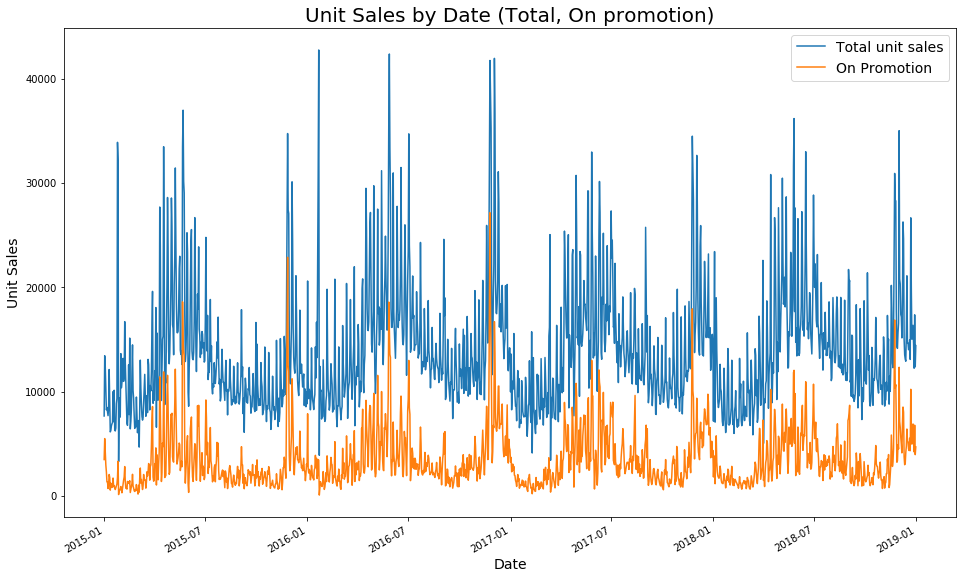

In [44]:
df_plot = train.groupby(by=['Date']).agg({'Retail Price':'sum'}).reset_index()
# turn date into datetime type
df_plot.Date = pd.to_datetime(df_plot.Date)

# Unit Sales by Date
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
#Set the plot figure
fig.set_figheight(10)
fig.set_figwidth(16)
# Create the plot title
plt.title('Unit Sales by Date (Total, On promotion)', fontsize=20)
# Plot total unit sales
plt.plot(df_plot.Date, df_plot['Retail Price'])

# plot unit sales on promotion
df_plot = train.loc[train['Promo/Discount'] == "S"].groupby(by=['Date']).agg({'Retail Price':'sum'}).reset_index()
plt.plot(df_plot.Date, df_plot['Retail Price'])

# Set the legend
plt.legend(['Total unit sales','On Promotion'], fontsize=14)

# Set the labels
plt.xlabel('Date',fontsize=14)
plt.ylabel('Unit Sales',fontsize=14)

In [21]:
df_train = train_zipcode

In [ ]:
df_plot = df_train.groupby(by=['Date']).agg({'Retail Price':'sum'}).reset_index()
# turn date into datetime type
df_plot.Date = pd.to_datetime(df_plot.Date)

# Unit Sales by Date
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
#Set the plot figure
fig.set_figheight(10)
fig.set_figwidth(16)
# Create the plot title
plt.title('Unit Sales by Date (Total, On promotion)', fontsize=20)
# Plot total unit sales
plt.plot(df_plot.Date, df_plot['Retail Price'])

# plot unit sales on promotion
df_plot = df_train.loc[df_train['Promo/Discount'] == "*"].groupby(by=['Date']).agg({'Retail Price':'sum'}).reset_index()
plt.plot(df_plot.Date, df_plot['Retail Price'])

# Set the legend
plt.legend(['Total unit sales','On Promotion'], fontsize=14)

# Set the labels
plt.xlabel('Date',fontsize=14)
plt.ylabel('Unit Sales',fontsize=14)

In [62]:
df_teain = a

In [ ]:
sns.set_style("white")
ax = plt.subplots(figsize=(13, 9))
sns.countplot(x="Promo/Discount", hue="Item Description", data=train_zipcode, palette="Greens_d",
              order=train_zipcode["Promo/Discount"].value_counts().iloc[:7].index);

In [41]:
import matplotlib as mpl
plt.rcParams['agg.path.chunksize'] = 2000000

Text(0, 0.5, 'Sale')

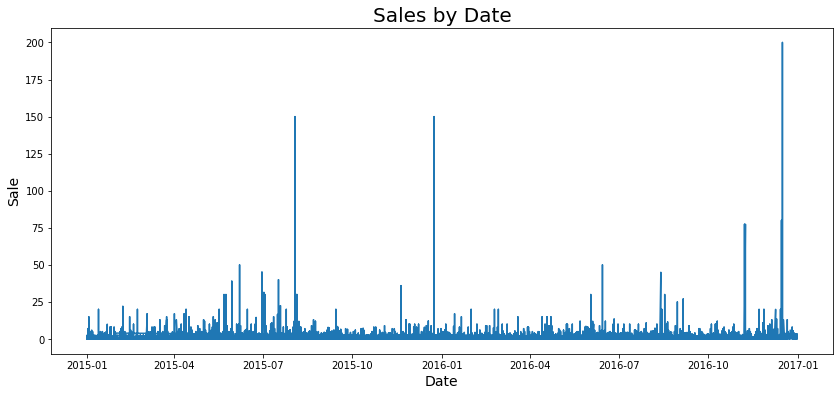

In [61]:
plt.figure(figsize=(14,6))
# Create the plot title
plt.title('Sales by Date', fontsize=20)
# Plot total unit sales
plt.plot(a.Date, a["Actual Price"])

# Set the labels
plt.xlabel('Date',fontsize=14)
plt.ylabel('Sale',fontsize=14)

In [38]:
train_zipcode

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,2015-04-01,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,3,...,10,11703,NaN,1982029025,MELISSA MOORMAN,Sale,1,Sale,Category Price Plan,NaN
1,2015-04-01,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05482X,REG SEL INT MATTE BS2 GL,2,...,10,11703,NaN,1982029025,MELISSA MOORMAN,Sale,3,Sale,Category Price Plan,NaN
2,2015-04-01,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4,...,0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1,Sale,Retail,NaN
3,2015-04-01,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8,...,0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2,Sale,Retail,NaN
4,2015-04-01,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1,...,0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15627493,2016-09-30,21:06:21,*73721,E37782,6,11116 BELLMORE,90017759,DP102123,ACE-A-VERSARY $5 OFF $20,1,...,0,11793,3643,1906892325,NICOLE BROWN,Sale,6,Sale,No Charge,NaN
15627494,2016-09-30,21:14:44,500868,I38056,3,3164 NESCONSET,51643061880,8009730,"CORD STRETCH 48"" HVY DTY",1,...,3.89,11787,NaN,1981639914,ANDRIY CHEVEVAN,Sale,1,Sale,Category Price Plan,NaN
15627495,2016-09-30,21:14:44,500868,I38056,3,3164 NESCONSET,82901731900,73190,TARP POLY BLUE/BRN 6X8,1,...,4.93,11787,NaN,1981639914,ANDRIY CHEVEVAN,Sale,2,Sale,Category Price Plan,NaN
15627496,2016-09-30,21:14:44,500868,I38056,3,3164 NESCONSET,42854024986,1365527,SPRAYER ORBITAL 24 OZ,1,...,1.99,11787,NaN,1981639914,ANDRIY CHEVEVAN,Sale,3,Sale,Category Price Plan,NaN


In [15]:
train_transaction_df[['Actual-Retail','Actual Price','Retail Price','Net Sales','Item Number','Item Description','Store #']]

,Actual-Retail,Actual Price,Retail Price,Net Sales,Item Number,Item Description,Store #
0,$0.05,0.05,0.00,0.05,56,FASTENERS,9
1,($3.00),64.99,67.99,64.99,7158314,ACE FERT 4STEP 5M,O
2,$0.00,20.00,20.00,-20,IS117235,7158314 $20 INST SAVINGS,O
3,$0.00,7.99,7.99,7.99,78832,"ACE DECK NAIL16D3.5""ST1#",F
4,$0.32,0.32,0.00,0.32,9269862,CMN Donations,F
...,...,...,...,...,...,...,...
17328038,($2.93),1.06,3.99,1.06,3016607,BATTRY ALKLN AAA CD4 ACE,a
17328039,($7.29),7.70,14.99,7.7,10541,"PALMYRA PUSHBROOM 18""",a
17328040,($3.78),1.21,4.99,1.21,12172,WIRE BRUSH MINI SS 3PK,a
17328041,($1.56),1.23,2.79,1.23,1455567,BRUSH SCRUB HANG-UP,a


In [24]:
train = train_transaction_df

In [48]:
train1 = train_transaction_df.dropna()

In [50]:
train1.shape

(499, 1)

In [51]:
train1

,119.97
0,79.98
1,11.96
2,23.92
3,14.99
4,4.99
...,...
494,33.98
495,9.99
496,6.99
497,17.98


In [18]:
visual_z = visual[visual['Store #'] =='z']

NameError: name 'visual' is not defined

In [ ]:
visual_z = visual_z.sort_values(by='Date',ascending=True)
visual_z

In [ ]:
visual_z = visual_z.sort_values(by='Actual Price',ascending=True)
visual_z

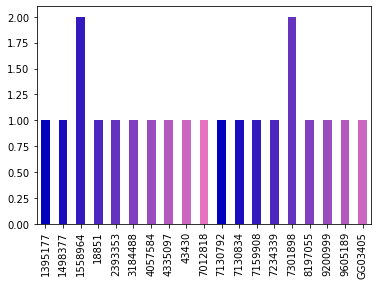

In [52]:
from itertools import cycle, islice
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(10)]
visual_z["Item Number"].value_counts().sort_index().plot.bar(stacked=True, color=my_colors)

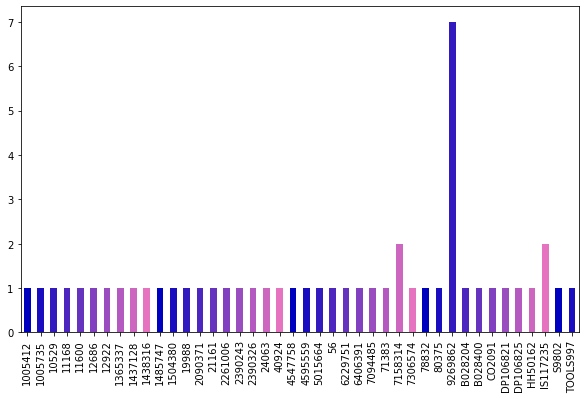

In [56]:
from itertools import cycle, islice
plt.figure(figsize=(10,6))
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(10)]
train["Item Number"].head(50).value_counts().sort_index().plot.bar(stacked=True, color=my_colors)

<Figure size 720x432 with 0 Axes>

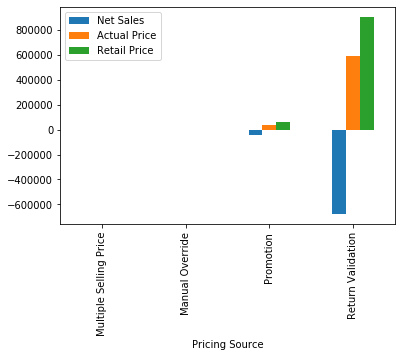

In [26]:
plt.figure(figsize=(10,6))
train1.groupby("Pricing Source").sum().sort_values("Net Sales", ascending=False).plot(kind='bar')

<Figure size 720x576 with 0 Axes>

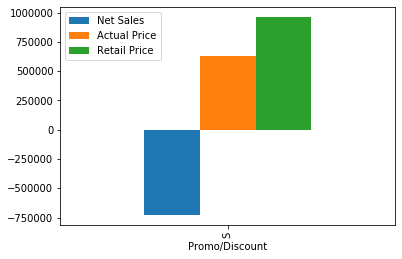

In [27]:
plt.figure(figsize=(10,8))
train1.groupby("Promo/Discount").sum().sort_values("Actual Price", ascending=False).plot(kind='bar')

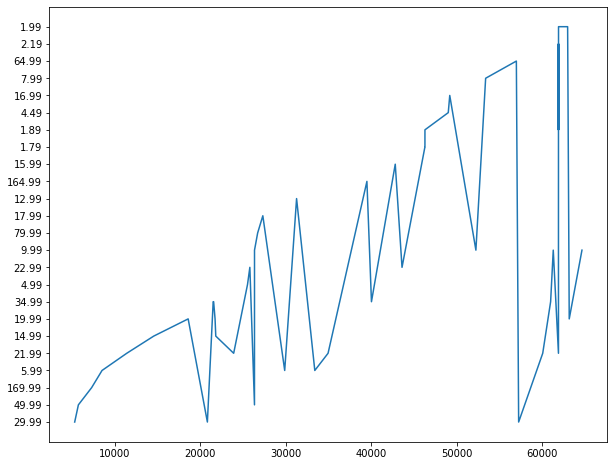

In [49]:
from sklearn.preprocessing import MinMaxScaler
plt.figure(figsize=(10,8))
plt.plot(train1["Retail Price"].head(50))
plt.show()


In [30]:
train_dend = train1.head(5000)

<Figure size 1440x720 with 0 Axes>

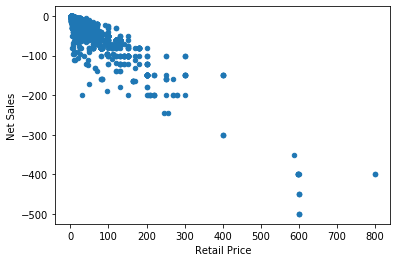

In [31]:
plt.figure(figsize=(20, 10))  
train_dend.plot.scatter(x='Retail Price',y='Net Sales')


In [25]:
train

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,2015-04-01,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,3,...,10,11703,NaN,1982029025,MELISSA MOORMAN,Sale,1,Sale,Category Price Plan,NaN
1,2015-04-01,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05482X,REG SEL INT MATTE BS2 GL,2,...,10,11703,NaN,1982029025,MELISSA MOORMAN,Sale,3,Sale,Category Price Plan,NaN
2,2015-04-01,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4,...,0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1,Sale,Retail,NaN
3,2015-04-01,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8,...,0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2,Sale,Retail,NaN
4,2015-04-01,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1,...,0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2018-04-07,12:11:51,*5,C17961,T,16324 BROOKLYN,6.65719E+11,BGE119537,"Grade Flavor Injector, Stainles",1,...,0,NaN,NaN,NaN,GREG MICIELI,Sale,1,Sale,Retail,NaN
999996,2018-04-07,12:11:51,104506,I11210,6,11116 BELLMORE,37321002550,AR255,DEAD BUG BREW RTS QT,1,...,0,11566,3705,1912596828,NICOLE BROWN,Sale,1,Sale,Retail,NaN
999997,2018-04-07,12:11:51,104506,I11210,6,11116 BELLMORE,82901233060,23306,BLADE UTLTY KNIFE CD5ACE,1,...,0,11566,3705,1912596828,NICOLE BROWN,Sale,2,Sale,Retail,NaN
999998,2018-04-07,12:11:51,104506,I11210,6,11116 BELLMORE,76171101556,8206971,AIR FRESHNR BLACK ICE,1,...,0,11566,3705,1912596828,NICOLE BROWN,Sale,3,Sale,Retail,NaN


In [22]:
train_2 = train_transaction_df[train_transaction_df['Store #'] =='2']

In [23]:
train_2.dtypes

Date                          datetime64[ns]
Transaction Time                      object
Customer Number                       object
Receipt Number                        object
Store #                               object
Store Name                            object
Scanned UPC                           object
Item Number                           object
Item Description                      object
Net Sales Units                       object
Net Sales                            float64
Cost                                  object
Gross Margin                          object
Gross Margin %                        object
Department Code                       object
Department Name                       object
Class Code                            object
Class Name                            object
Fineline Code                         object
Fineline Name                         object
Item was Scanned                      object
MIP Promo ID                          object
Promo/Disc

Text(0.5, 1.0, 'Price Distribution')

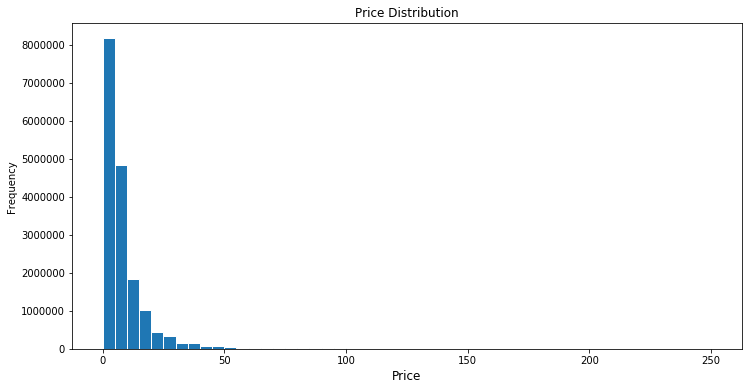

In [23]:
plt.figure(figsize=(16,8))
(train_transaction_df['Actual Price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('Price', fontsize=12)
plt.title('Price Distribution', fontsize=12)


Text(0.5, 1.0, 'Price Distribution')

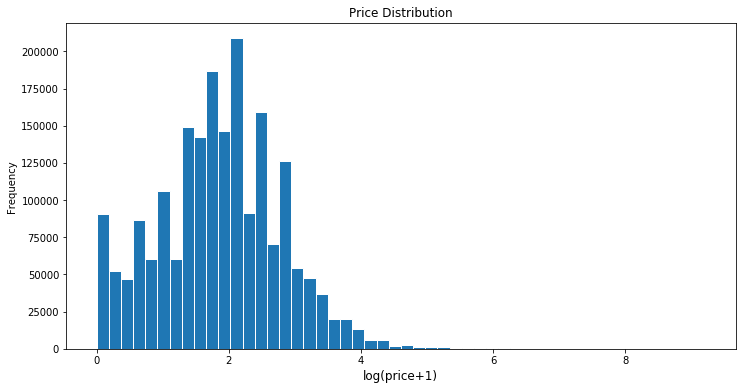

In [49]:
plt.figure(figsize=(16,8))
np.log(train['Actual Price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
mod = sm.tsa.SARIMAX(train['Retail Price'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()

In [40]:
import lstm, time

In [40]:
train_2 = train_2.sort_values(by='Date',ascending=True)

In [75]:
train_z = visual[visual['Store #'] =='z']

In [76]:
train_z = train_z.sort_values(by='Date',ascending=True)

In [77]:
train_z

,Item Number,Store #,Date,Actual Price,Retail Price,Net Sales
7222998,7012818,z,2017-01-18,10.56,22.99,10.56
7521603,7159908,z,2017-07-12,9.75,17.99,9.75
4868264,43430,z,2017-07-12,1.55,5.99,1.55
4824909,4335097,z,2017-07-12,1.53,7.99,1.53
4273089,4057584,z,2017-07-12,1.49,6.99,1.49
1191015,1395177,z,2017-07-12,0.54,1.49,0.54
2072926,18851,z,2017-07-12,7.14,14.99,7.14
1484997,1498377,z,2017-07-12,5.23,9.99,5.23
10815369,GG03405,z,2017-07-12,0.67,1.49,1.34
7735355,7234339,z,2017-07-17,21.28,34.99,21.28


In [11]:
train_transaction_df = train_transaction_df.sort_values(by='Date',ascending=True)

In [50]:
train_2.dtypes

Date                          datetime64[ns]
Transaction Time                      object
Customer Number                       object
Receipt Number                        object
Store #                               object
Store Name                            object
Scanned UPC                           object
Item Number                           object
Item Description                      object
Net Sales Units                       object
Net Sales                            float64
Cost                                  object
Gross Margin                          object
Gross Margin %                        object
Department Code                       object
Department Name                       object
Class Code                            object
Class Name                            object
Fineline Code                         object
Fineline Name                         object
Item was Scanned                      object
MIP Promo ID                          object
Promo/Disc

In [35]:
df = train['Net Sales'].head(500)

In [36]:
df.to_csv(r'C:\Project\NetData.csv', index=False, float_format='%g')

C:\Users\rishk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [37]:
X_train = train_transaction_df = pd.read_csv(r'C:\Project\NetData.csv')

In [38]:
X_train.dtypes

119.97    float64
dtype: object

In [41]:
X_train, y_train, X_test, y_test = lstm.load_data(r'C:\Project\NetData.csv', 50, True)

In [ ]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
#print('compilation time : ', time.time() - start)

In [3]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

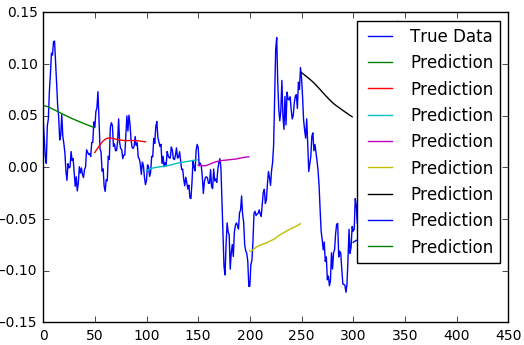

In [2]:
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

In [23]:
X = train_transaction_df[["Actual Price","Retail Price"]].head(1000)

In [24]:
y = train_transaction_df["Net Sales"].head(1000)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [21]:
import statsmodels.api as sm

In [26]:
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [27]:
lr.params

const          -0.433983
Actual Price    0.488236
Retail Price    0.503025
dtype: float64

In [28]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              Net Sales   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     4668.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:16:17   Log-Likelihood:                -2621.2
No. Observations:                 700   AIC:                             5248.
Df Residuals:                     697   BIC:                             5262.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4340      0.411     -1.056   

In [30]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [33]:
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.662551620122483

In [36]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8441718939265872

In [40]:
from sklearn import ensemble
xbr=ensemble.GradientBoostingRegressor()
xbr

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
xbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
xbr.score(X_train,y_train)

0.9613871139916293

In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [44]:
def XGBmodel(x_train,x_test,y_train,y_test):
    matrix_train = xgb.DMatrix(x_train,label=y_train)
    matrix_test = xgb.DMatrix(x_test,label=y_test)
    model=xgb.train(params={'objective':'reg:linear','eval_metric':'mae'}
                    ,dtrain=matrix_train,num_boost_round=500, 
                    early_stopping_rounds=20,evals=[(matrix_test,'test')],)
    return model

model=XGBmodel(X_train,X_test,y_train,y_test)

[16:34:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-mae:8.62066
Will train until test-mae hasn't improved in 20 rounds.
[1]	test-mae:6.82544
[2]	test-mae:5.61044
[3]	test-mae:4.79697
[4]	test-mae:4.33781
[5]	test-mae:4.09831
[6]	test-mae:4.01957
[7]	test-mae:3.93441
[8]	test-mae:3.86259
[9]	test-mae:3.83394
[10]	test-mae:3.83187
[11]	test-mae:3.82355
[12]	test-mae:3.80933
[13]	test-mae:3.81805
[14]	test-mae:3.82351
[15]	test-mae:3.84704
[16]	test-mae:3.85029
[17]	test-mae:3.85921
[18]	test-mae:3.87762
[19]	test-mae:3.89737
[20]	test-mae:3.91188
[21]	test-mae:3.91308
[22]	test-mae:3.91235
[23]	test-mae:3.9192
[24]	test-mae:3.92848
[25]	test-mae:3.92936
[26]	test-mae:3.94439
[27]	test-mae:3.93929
[28]	test-mae:3.94022
[29]	test-mae:3.93437
[30]	test-mae:3.94686
[31]	test-mae:3.94937
[32]	test-mae:3.94683
Stopping. Best iteration:
[12]	test-mae:3.80933



C:\Users\rishk\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


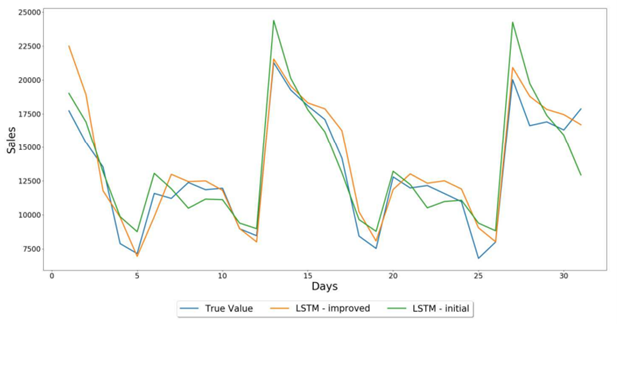

In [50]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')


model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)